


# Amir Dodangeh , Image Processing
#HW-02




Apply each spatial filters to the image according to the below table and compare the original 
image and the image after using the filter.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Size of Orginal image:  0.125
type of image1: uint8
Shape of image1: (500, 500, 3)
Number of Bytes: 93750.0


Text(0.5, 1.0, 'Original image-1')

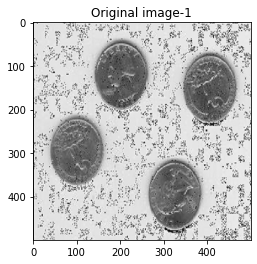

In [ ]:

from google.colab import drive

drive.mount('/content/gdrive')
import numpy as np
%matplotlib inline
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

image1=io.imread("/content/gdrive/My Drive/Colab Notebooks/Image Processing/HW2/images/image1.jpg",0)

image2=io.imread("/content/gdrive/My Drive/Colab Notebooks/Image Processing/HW2/images/image2.jpg",0)

image3=io.imread("/content/gdrive/My Drive/Colab Notebooks/Image Processing/HW2/images/image3.jpg",0)

image4=io.imread("/content/gdrive/My Drive/Colab Notebooks/Image Processing/HW2/images/image4.jpg",0)

image5=io.imread("/content/gdrive/My Drive/Colab Notebooks/Image Processing/HW2/images/image5.jpg",0)

image6=io.imread("/content/gdrive/My Drive/Colab Notebooks/Image Processing/HW2/images/image6.jpg",0)

import sys

size11=sys.getsizeof(image1)
print ("Size of Orginal image: ",size11/1024)
print("type of image1:",image1.dtype)
print("Shape of image1:",image1.shape)
print("Number of Bytes:" ,image1.size/8)

plt.imshow(image1, cmap='gray', vmin=0, vmax=255)
plt.title("Original image-1")


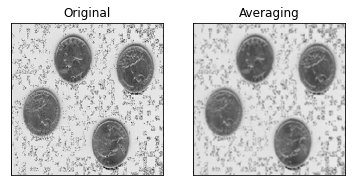

In [ ]:
#a Average(Mean) filter 5 * 5 image1
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(image1,-1,kernel)

plt.subplot(121),plt.imshow(image1),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

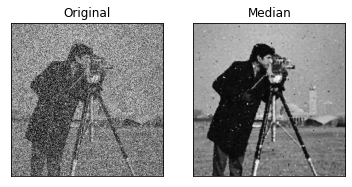

In [ ]:
#b Median filter 5 * 5 Image2

median = cv.medianBlur(image2,5)


plt.subplot(121),plt.imshow(image2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


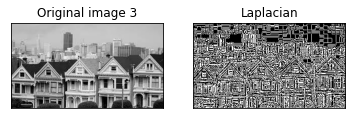

In [ ]:
#c Laplacian filter 5 * 5 Image3

laplacian = cv.Laplacian(image3,cv.CV_64F)


plt.subplot(2,2,1),plt.imshow(image3,cmap = 'gray')
plt.title('Original image 3'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])



plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

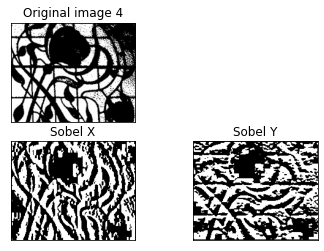

In [47]:
#d Sobel(X and Y) filter 7 * 7 Image4

sobelx = cv.Sobel(image4,cv.CV_64F,1,0,ksize=7)
sobely = cv.Sobel(image4,cv.CV_64F,0,1,ksize=7)


plt.subplot(2,2,1),plt.imshow(image4,cmap = 'gray')
plt.title('Original image 4'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])



Apply frequency filters in each case and compare the original image and the image after using 
the filter:

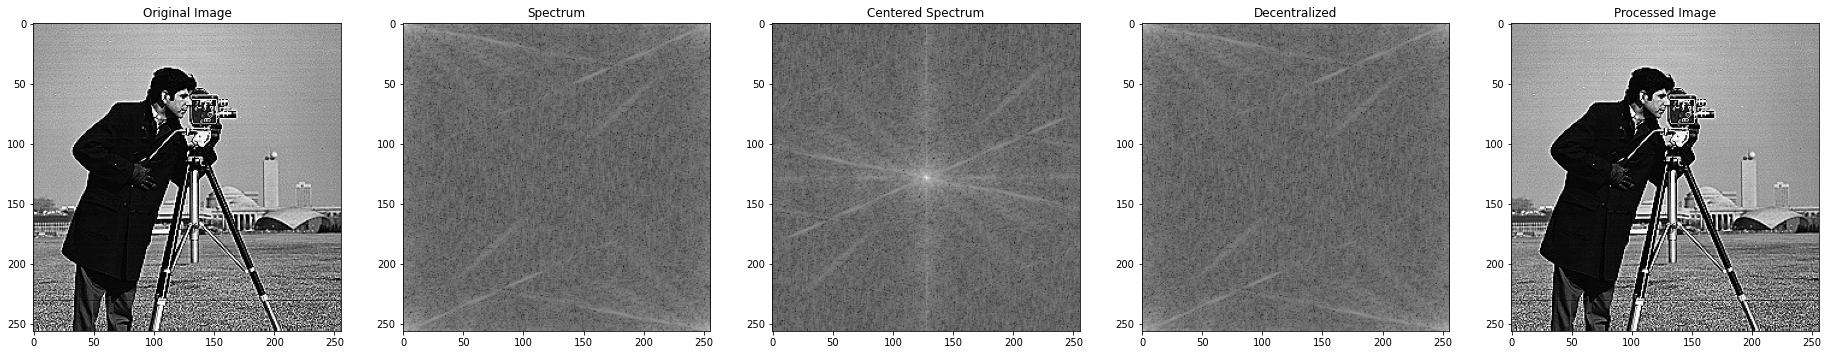

In [ ]:
# Apply frequency spectrum with Fast Fourier Transformation (FFT), centered spectrum, 
#decentralized spectrum and inverse FFT on image5 and show them.


import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#img_c1 = cv.imread("/content/gdrive/My Drive/Colab Notebooks/Image Processing/HW2/images/image5.jpg", 0)

img_c1 = image5 [:,:,2] ## blue channel!!!!!!!! very Important
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6386d82390>,
 Text(0.5, 1.0, 'IHPF R=10'))

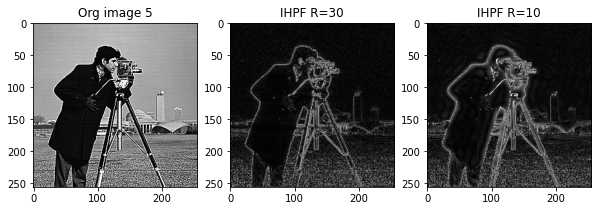

In [ ]:
# Apply Ideal Low Pass Filter (ILPF) and Ideal High Pass Filter (IHPF) on image5 and 
#show them

#new_img=cv2.imread('person.jpg',0)
new_img=img_c1
rows,cols=new_img.shape
crow,ccol=int(rows/2),int(cols/2)
mask1=np.ones((rows,cols),np.uint8)
mask2=np.ones((rows,cols),np.uint8)
mask1[crow-30:crow+30,ccol-30:ccol+30]=0
mask2[crow-10:crow+10,ccol-10:ccol+10]=0   #THIS IS OUR ONLY POINTS BRO

f1=np.fft.fft2(new_img)
f1shift=np.fft.fftshift(f1)
f1shift_1=f1shift*mask1
f1shift_2=f1shift*mask2

f_ishift_1=np.fft.ifftshift(f1shift_1)
f_ishift_2=np.fft.ifftshift(f1shift_2)

img_back_1=np.fft.ifft2(f_ishift_1)
img_back_2=np.fft.ifft2(f_ishift_2)

img_back_1=np.abs(img_back_1)
img_back_2=np.abs(img_back_2)

plt.figure(figsize=(10,10))

plt.subplot(231),plt.imshow(new_img,cmap='gray'),plt.title('Org image 5')
plt.subplot(232),plt.imshow(img_back_1,cmap='gray'),plt.title('IHPF R=30')
plt.subplot(233),plt.imshow(img_back_2,cmap='gray'),plt.title('IHPF R=10')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6386606c10>,
 Text(0.5, 1.0, 'ILPF R=10'))

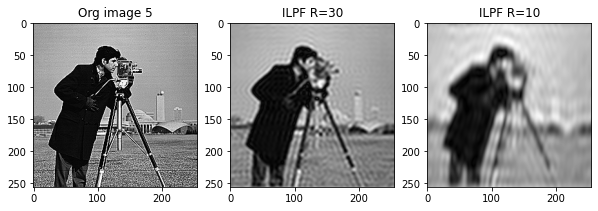

In [ ]:
#Import related libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
 #Use cv2 to read in the picture
new_img=img_c1
 
#Fourier changes in #pencv
dft=cv2.dft(np.float32(new_img),flags=cv2.DFT_COMPLEX_OUTPUT)
dtf_shift=np.fft.fftshift(dft) 
 #np.fft.fftshift() function to achieve the shift, so that the DC component is in the center of gravity of the output image 
 
rows,cols=new_img.shape 
crow,ccol=int(rows/2),int(cols/2) #Calculate spectrum center
mask=np.zeros((rows,cols,2),np.uint8) #Generate a 2 latitude matrix in the rows cols column, the data format is uint8 
mask2=np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30]=1 #Set part of the low-pass information near the center of the spectrum to 1, which belongs to low-pass filtering
mask2[crow-10:crow+10,ccol-30:ccol+10]=1
fshift=dtf_shift*mask
fshift2=dtf_shift*mask2
 
 #Inverse Fourier Transform
f_ishift=np.fft.ifftshift(fshift) 
img_back=cv2.idft(f_ishift) 
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) #Calculate the absolute value of the pixel gradient
img_back=np.abs(img_back)
img_back=(img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
 



f_ishift2=np.fft.ifftshift(fshift2) 
img_back2=cv2.idft(f_ishift2) 
img_back2=cv2.magnitude(img_back2[:,:,0],img_back2[:,:,1]) #Calculate the absolute value of the pixel gradient
img_back2=np.abs(img_back2)
img_back2=(img_back2-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))





plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(new_img,cmap='gray'),plt.title('Org image 5')
plt.subplot(132),plt.imshow(img_back,cmap='gray'),plt.title('ILPF R=30')
plt.subplot(133),plt.imshow(img_back2,cmap='gray'),plt.title('ILPF R=10')


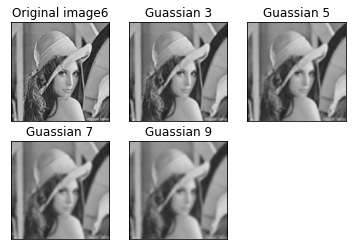

In [ ]:
#(c) Apply Gaussian Smoothing with 3, 5,7and 9 kernel size on image6 and show them



Gauss3 = cv.GaussianBlur(image6,(3,3),0)
Gauss5 = cv.GaussianBlur(image6,(5,5),0)
Gauss7 = cv.GaussianBlur(image6,(7,7),0)
Gauss9 = cv.GaussianBlur(image6,(9,9),0)



plt.subplot(2,3,1),plt.imshow(image6,cmap = 'gray')
plt.title('Original image6'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,2),plt.imshow(Gauss3,cmap = 'gray')
plt.title('Guassian 3'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,3),plt.imshow(Gauss5,cmap = 'gray')
plt.title('Guassian 5'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,4),plt.imshow(Gauss7,cmap = 'gray')
plt.title('Guassian 7'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,5),plt.imshow(Gauss9,cmap = 'gray')
plt.title('Guassian 9'), plt.xticks([]), plt.yticks([])

plt.show()